In [67]:
import pandas as pd
import numpy as n

dataPath1 = "/home/peter/dev/Work/Transportation/Output/performaceMeasures_sentimentTagging_2019-12-16__21-33-41_DL_PS.csv"
dataPath2 = "/home/peter/dev/Work/Transportation/Output/performaceMeasures_sentimentTagging_2019-12-16__21-36-00_virtual_azure.csv"



d1 = pd.read_csv(dataPath1, encoding="ISO-8859-1")
d2 = pd.read_csv(dataPath2, encoding="ISO-8859-1")

renamedCols = {'_test':'Testing data', '_train':'Training data' }
d1.rename(columns=renamedCols,inplace=True)
d2.rename(columns=renamedCols,inplace=True)

In [68]:
d1['Testing data'].unique()

array(['imdb', 'rt', 'twitter', 'finM', 'finH'], dtype=object)

In [69]:
replacedValues={'imdb':'IMDB', 'rt':'Reuters', 'twitter':'Twitter', 'finM':'Financial messages', 'finH':'Financial headlines'}
d1.replace(replacedValues,inplace=True)

In [70]:
def list_diff(list1, list2): 
	return (list(set(list1) - set(list2)))
# %%
other_cols=['Training data' ,'Testing data']
all_cols = d1.columns.to_list()
meassureCols = list_diff(all_cols,other_cols)

# ['false_positives', 'auc', 'loss', 'recall', 'test_num_records', 'train_num_records', 'true_negatives', 'eval_accuracy', 'precision', 'f1_score', 'true_positives', 'false_negatives', 'global_step']
# ['_test', '_train', 'auc', 'eval_accuracy', 'f1_score', 'false_negatives', 'false_positives', 'global_step', 'loss', 'precision', 'recall', 'test_num_records', 'train_num_records', 'true_negatives', 'true_positives']

In [71]:
def plotMeassures(measure,graphTitle):
    s1 = ['Training data','Testing data',  measure]
    #%%
    data1_1 = d1[s1]
    #%%
    data1_1_matrix = data1_1.pivot(*s1)
    #%%    
    import matplotlib.ticker as ticker
    import matplotlib.cm as cm
    import matplotlib as mpl
    
    import matplotlib.pyplot as plt
    %matplotlib inline
    import seaborn as sns
    #%%
    
    fig = plt.figure(figsize=(10,10))
    
    r = sns.heatmap(data1_1_matrix, cmap='BuPu',annot=True)
    
    r.set_yticklabels(r.get_yticklabels(),rotation=0)
    
    r.set_title(graphTitle)
    
    # fix for mpl bug that cuts off top/bottom of seaborn viz
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show() # ta-da!`
    

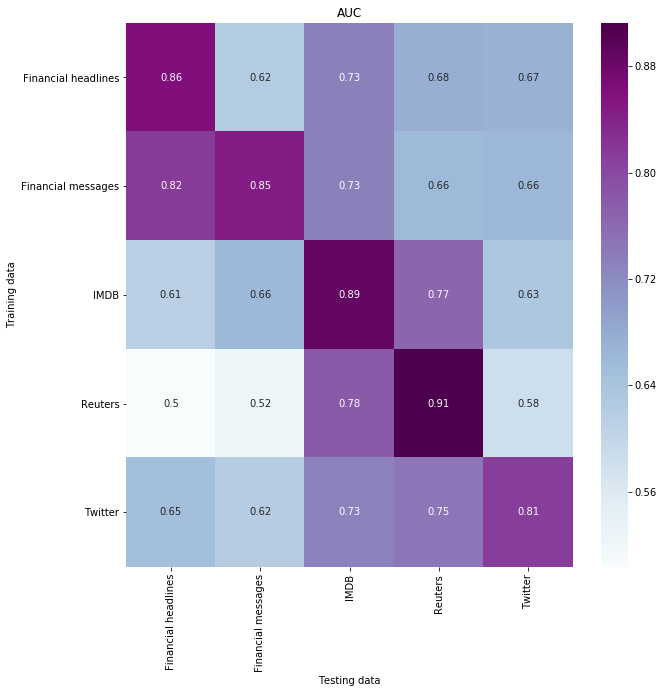

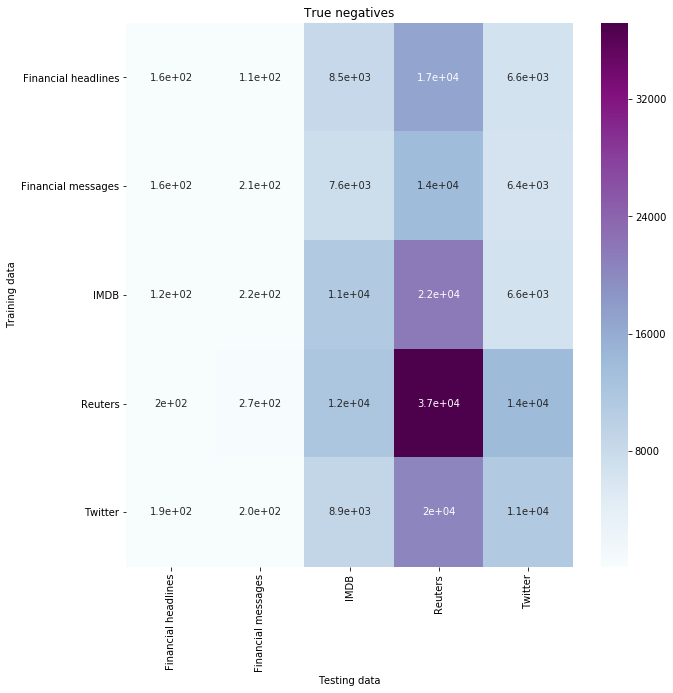

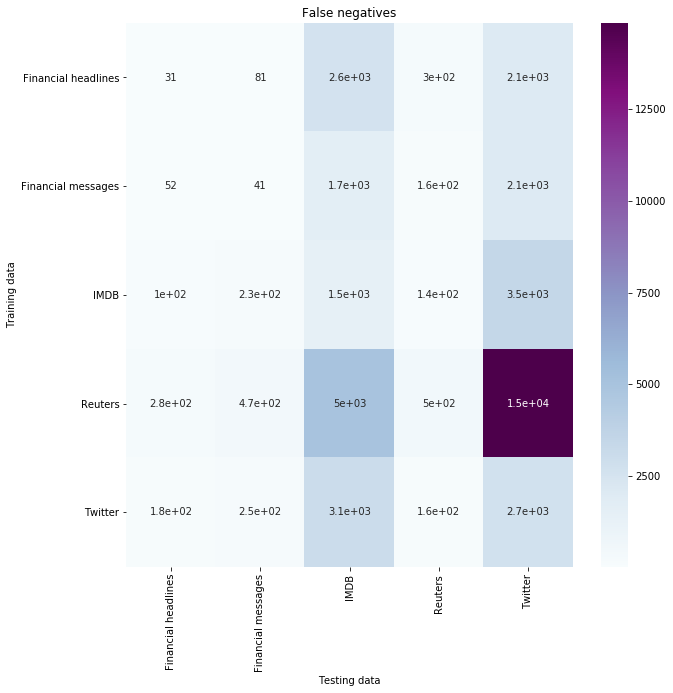

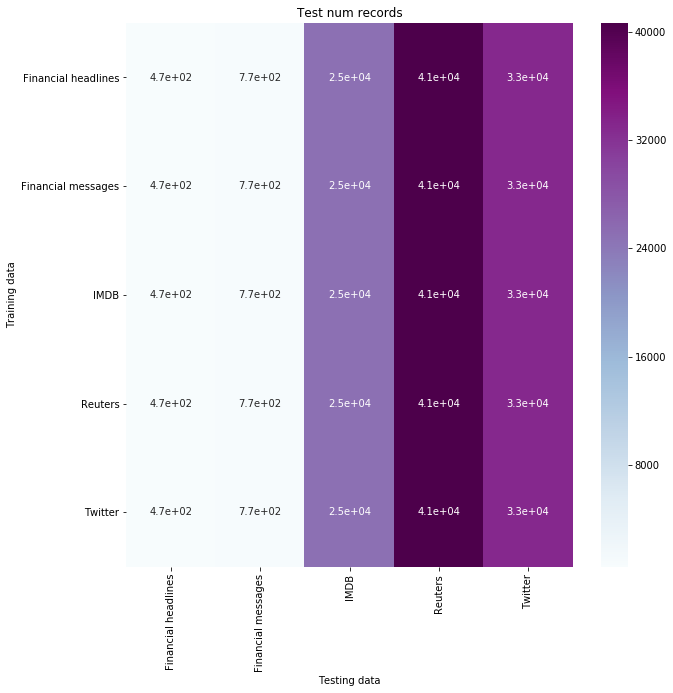

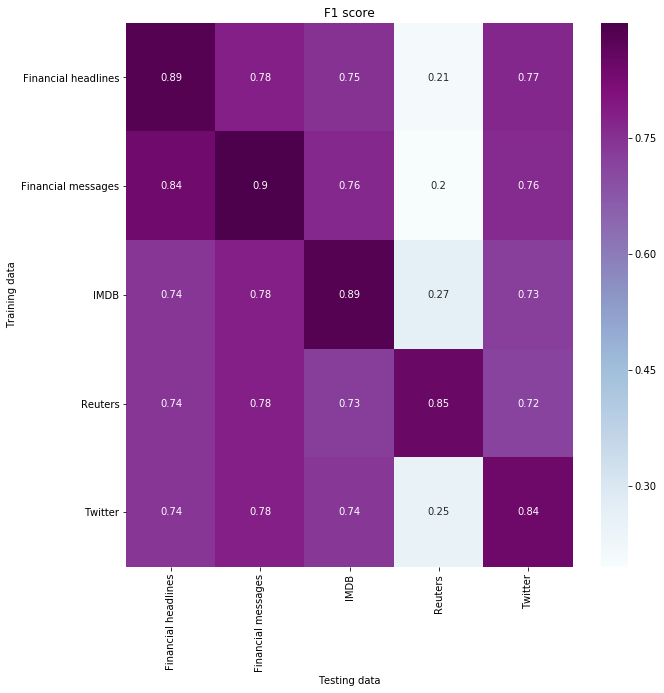

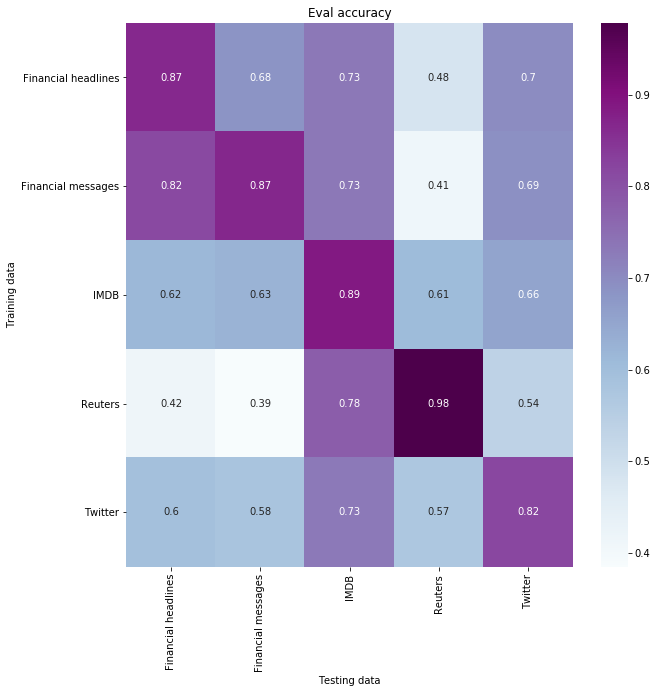

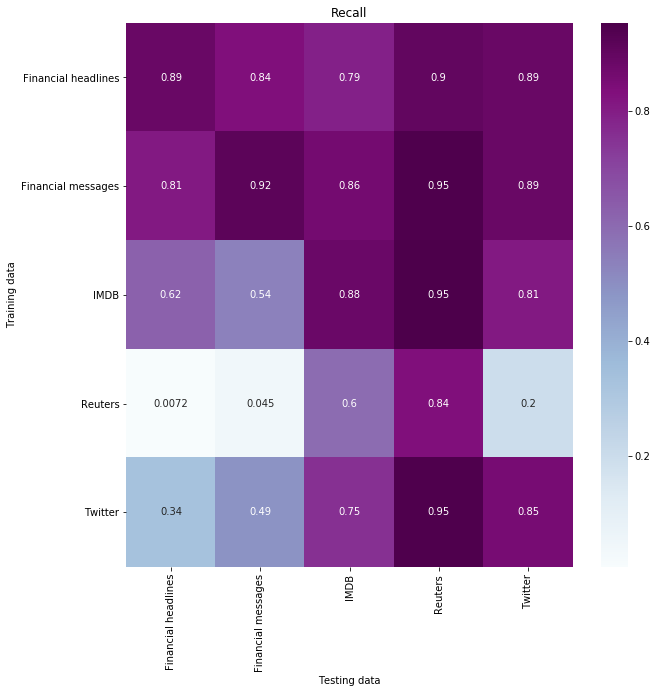

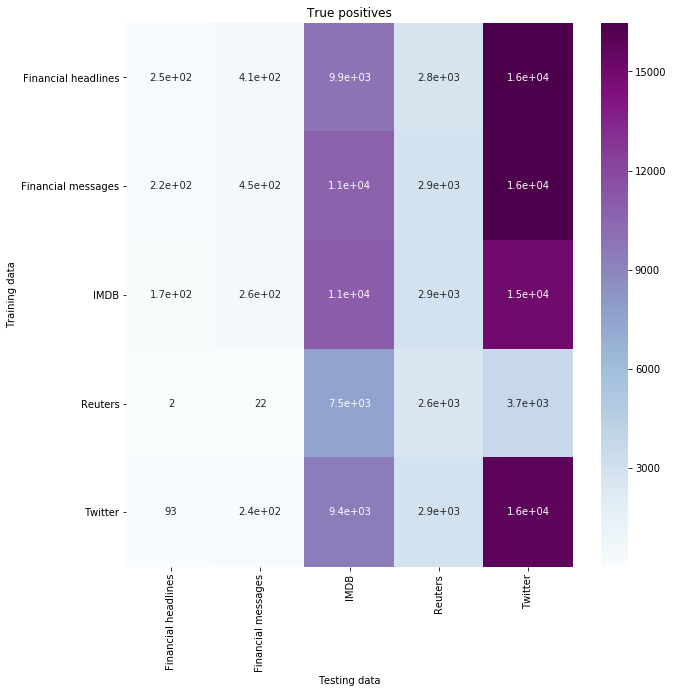

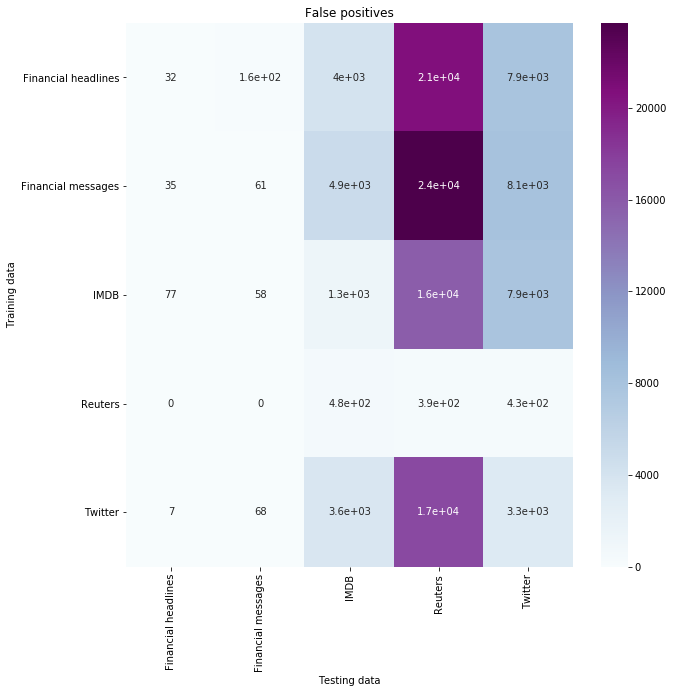

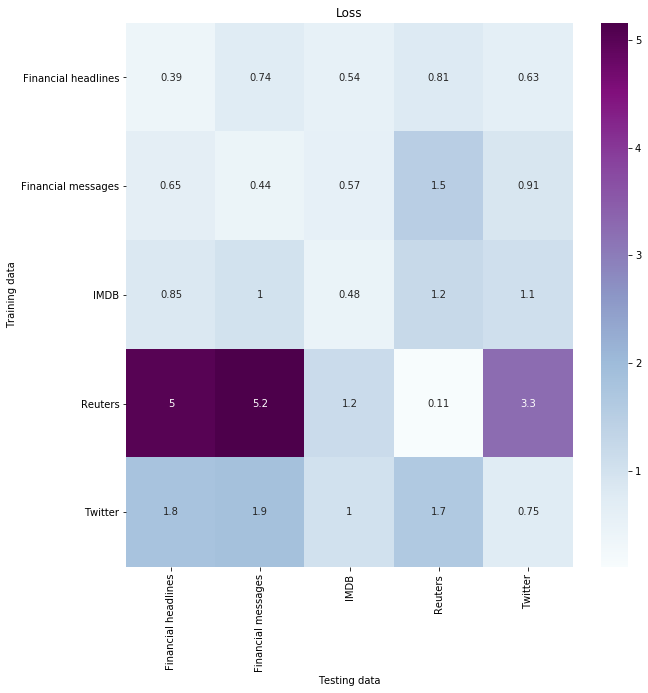

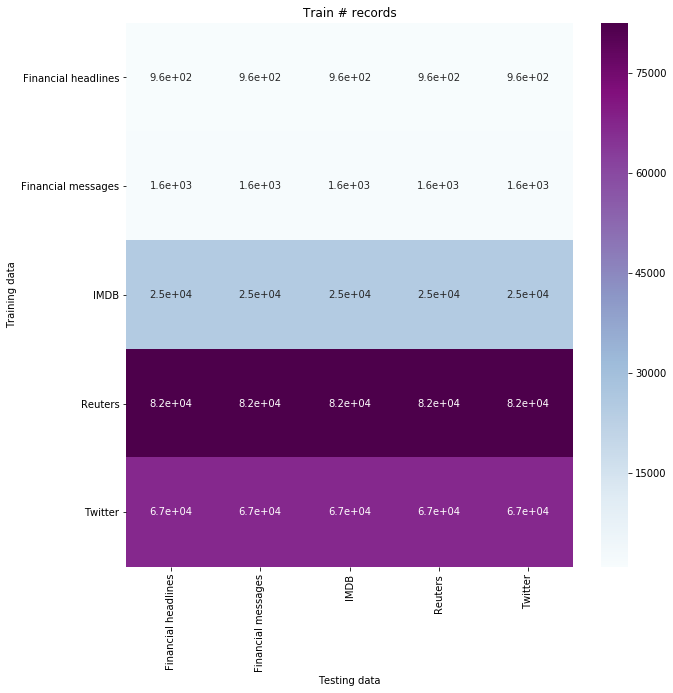

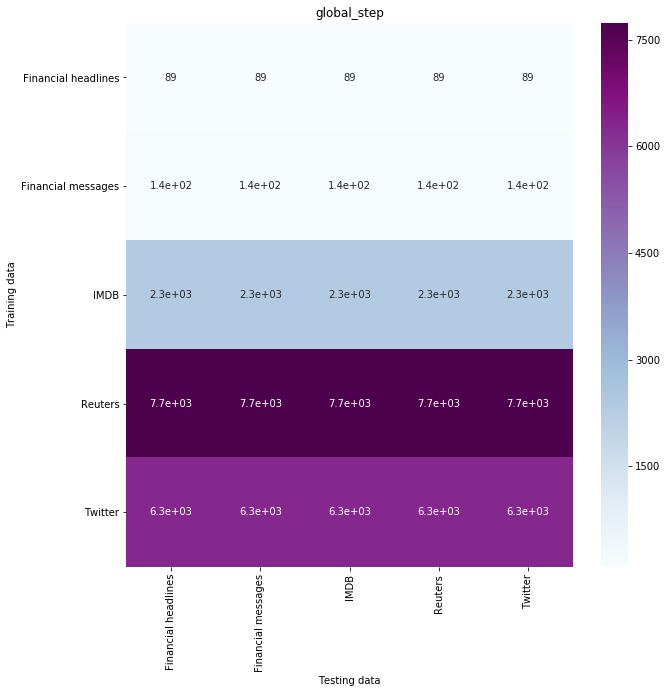

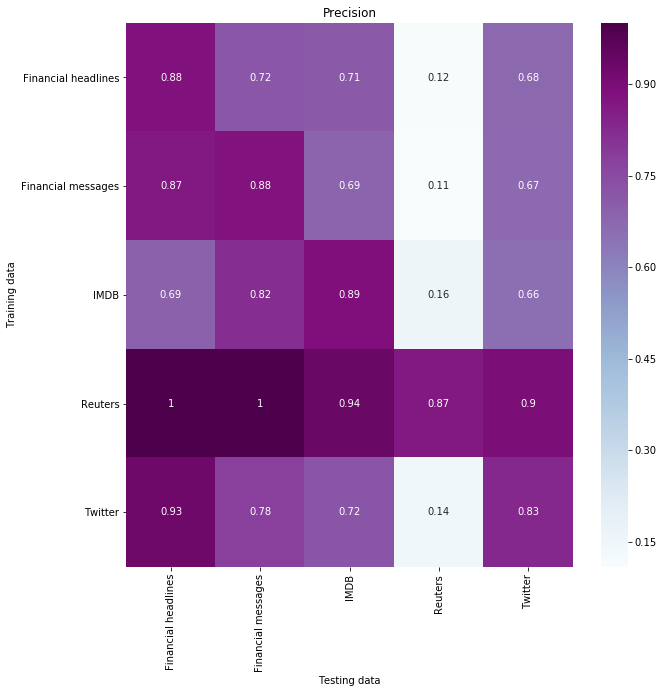

In [72]:
graphTitles = {'auc':'AUC', 'true_negatives':'True negatives', 'false_negatives':'False negatives', 'test_num_records': 'Test num records', 'f1_score':'F1 score', 'eval_accuracy':'Eval accuracy', 'recall':'Recall', 'true_positives':'True positives', 'false_positives':'False positives', 'loss':'Loss', 'train_num_records':'Train # records', 'global_step':'global_step', 'precision':'Precision'}

for meassureColName in meassureCols:      
    plotMeassures(meassureColName,graphTitles[meassureColName])

